# CASE STUDY 5 ON ANOVA

QUESTION : XYZ Company has offices in four different zones. The company wishes to
investigate the following :


● The mean sales generated by each zone.
● Total sales generated by all the zones for each month.
● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.


In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
#Reading the dataset
data=pd.read_csv('Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
#Chcking the total number of rows and columns in our dataset
data.shape

(29, 5)

In [4]:
#Checking if any null values present or not
data.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [5]:
#Getting the details of the dataset using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


<AxesSubplot:>

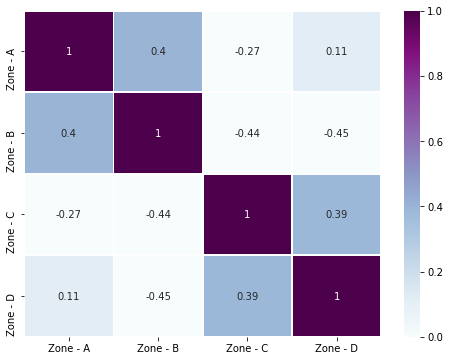

In [6]:
#Plotting correlation using heatmap
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), vmin=0, vmax=1, linewidth=0.8, annot=True,cmap="BuPu")

The variables are correlated with eachothers.

## 1.The mean sales generated by each zone.

In [7]:
#Getting the column names
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [8]:
#Finding mean sales for each zone
zone_means=data[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].mean()

In [9]:
zone_means.round(2)

Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

In [10]:
#Plotting bar plot for mean sales generated by each zone
#Droppig month column
data1=data.drop('Month',axis=1)

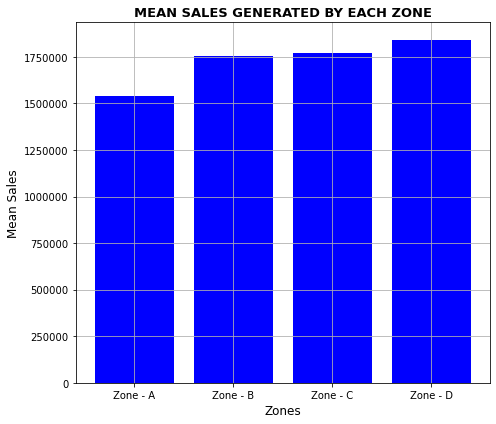

In [11]:
zone_names= data1.columns
z_means= data1.mean().round(2)
plt.figure(figsize=(7,6))
plt.ticklabel_format(style='plain')
plt.bar(zone_names,z_means, color ='blue')
plt.title("MEAN SALES GENERATED BY EACH ZONE", fontsize = 13,fontweight ='bold')
plt.xlabel("Zones",fontsize=12)
plt.ylabel("Mean Sales",fontsize=12)
plt.tight_layout()
plt.grid()
plt.show()

From the above graph we can conclude that Zone D has highest and Zone A has lowest mean sales 

## 2.Total sales generated by all the zones for each month

In [12]:
data["Total Sales"] = data.sum(axis=1)
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


Above table shows Total Sales generated by all zones for each months.

In [13]:
#Plotting bar plot for Total Sales generated by all zones for each month

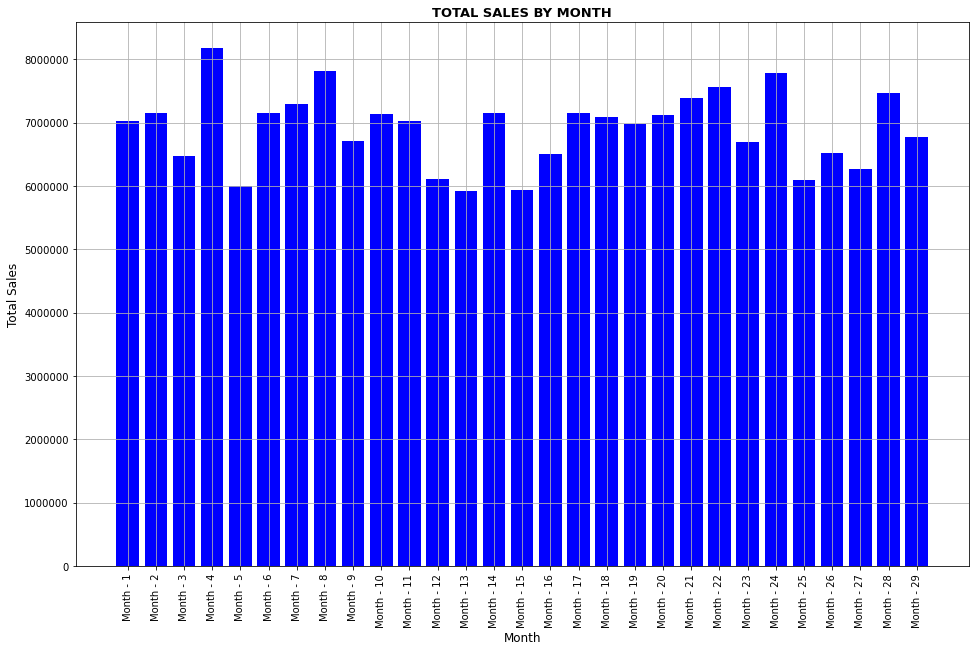

In [14]:
plt.figure(figsize=(16,10))
x_data=data['Month']
y_data=data['Total Sales']
plt.ticklabel_format(style='plain')
plt.bar(x_data,y_data, color ='blue')
plt.title("TOTAL SALES BY MONTH", fontsize = 13,fontweight ='bold')
plt.xlabel("Month",fontsize=12)
plt.ylabel("Total Sales",fontsize=12)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

From the above plotted bar graph we can conclude that the highest sales was in month 4 and lowest sales was in month 13.

## 3. Check whether all the zones generate the same amount of sales.

In [15]:
#We will check whether all the zones generate the same amount of sales or not by checking the equality of means.
#We will use one-way ANOVA for checking the equality of means 
#scipy.stats.f_oneway() will be used to find one-way ANOVA

In [16]:
#First we will set the null(H0) and alternative(H1) hypothesis 
#We will take significance value alpha=.05

H0 : ALL THE ZONES GENERATE SAME AMOUNT OF SALES.

H1 : ATLEAST ONE OF THE ZONE GENERATE DIFFERENT AMOUNT OF SALES.

In [17]:
#Finding f and p values
f_value,p_value=stat.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

In [18]:
#printing f and p values

In [19]:
print(f_value)

5.672056106843581


In [20]:
print(p_value)

0.0011827601694503335


In [21]:
#We will check if p value is less than or greater than the alpha value .05

In [22]:
if p_value<0.05:
    print(" Since P value",p_value,"is less than .05(alpha value), we can reject the null hypothesis")
else:
    print(" Since P value",p_value,"is greater than .05(alpha value), we cant reject the null hypothesis")

 Since P value 0.0011827601694503335 is less than .05(alpha value), we can reject the null hypothesis


### Since the calculated P Value=0.0011827601694503335 which is less than the alpha value .05 so we reject the Null Hypothesis  and we can conclude that  atleast one of the zone generate different amount of sales compared to the others.